In [2]:
import sys

sys.path.append('../src')
from hypothesis_testing import *
from load_data import txt_to_csv, data_loader

txt_to_csv('../data/MachineLearningRating_v3.txt','../data/weekthree.csv')

In [3]:
file_path = '../data/weekthree.csv'
df = data_loader(file_path)

c:\Users\user\Documents\Python\week-03\notebooks\../src\load_data.py:16: DtypeWarning: Columns (4,32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [3]:
# Explore the structure of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               104888 non-null   object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [4]:
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,NaN,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,NaN,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,NaN,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,NaN,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,NaN,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [5]:
# Show unique values of the 'Province' column.
df['Province'].unique()

array(['Gauteng', 'KwaZulu-Natal', 'Mpumalanga', 'Eastern Cape',
       'Western Cape', 'Limpopo', 'North West', 'Free State',
       'Northern Cape'], dtype=object)

In [6]:
df['StatutoryRiskType'].unique()

array(['IFRS Constant'], dtype=object)

In [7]:
print(df['TotalClaims'].unique())

[     0.           2294.09649123   2040.47368421 ... 101812.51754386
 155317.57894737  28903.85087719]


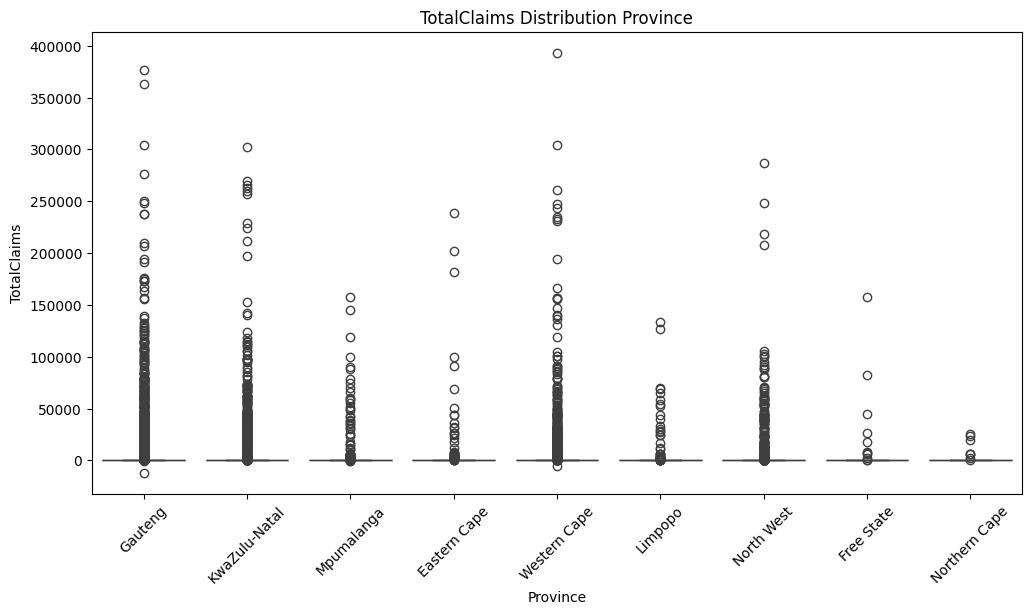

In [8]:
visualize_data(df, 'TotalClaims', 'Province')

In [ ]:
# Perform ANOVA test for TotalClaims and Province.
f_statistic, p_value = perform_anova(df, 'TotalClaims', 'Province')

In [10]:
# Testing the first hypothesis
# 1.There are no risk differences across provinces 
analyze_results(f_statistic, p_value)

Statistic: 5.84941376240761
P-value: 1.6782057588675903e-07
Reject the null hypothesis


From the p-value, it can be said that thre are risk differences across provinces.

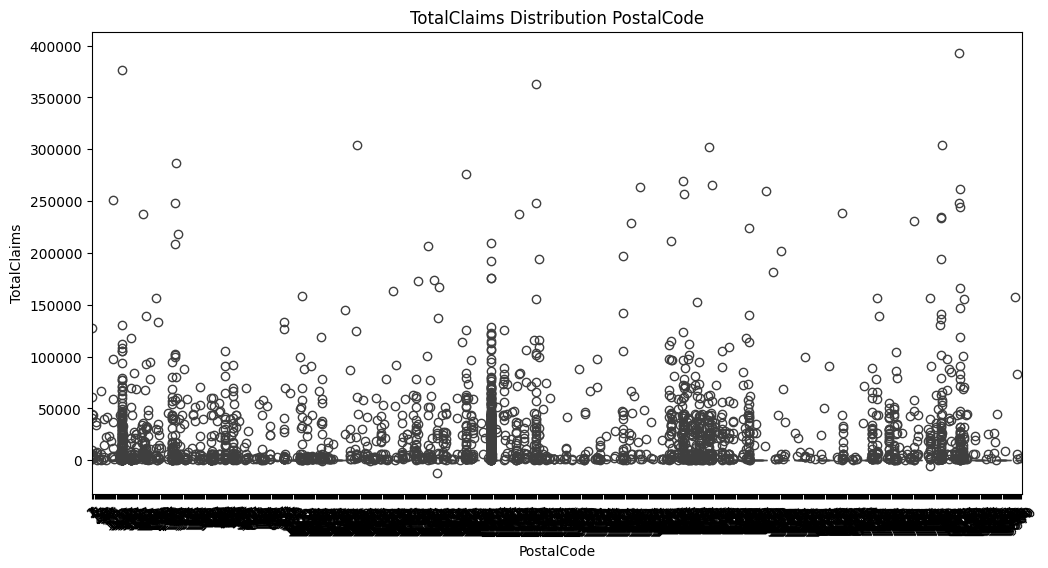

In [11]:
visualize_data(df, 'TotalClaims', 'PostalCode')

In [12]:
# Peform anova test for PostalCode and TotalClaims.
f_statistic, p_value = perform_anova(df, 'TotalClaims', 'PostalCode')

In [13]:
# Testing the second hypothesis
# 2. There are no risk differences between postal codes 
analyze_results(f_statistic, p_value)

Statistic: 0.9419762214391834
P-value: 0.8906511279164051
Fail to reject the null hypothesis


The null hypothesis which is there are no risk differences betweeb postal codes stands.

In [ ]:
# visualizing the distribution of profit margin across PostalCodes
df['profit_margin'] = df['TotalPremium'] - df['TotalClaims']

In [11]:
# Testing the third hypothesis
# 3. There are no significant margin (profit) difference between zip codes
statistic, p_value = perform_anova_margin(df, 'profit_margin')

In [12]:
analyze_results(statistic, p_value)

Statistic: 0.8707474893589257
P-value: 0.9976859758015036
Fail to reject the null hypothesis


The null hypothesis "There are no significant margin (profit) difference between zip codes" stands 

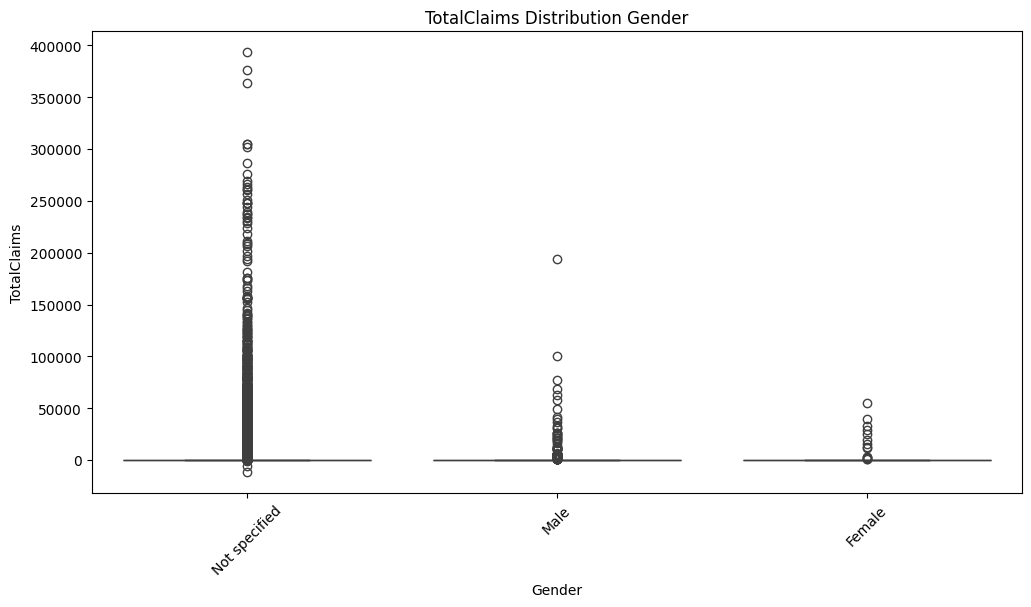

In [14]:
# Visualize the data for the 'Gender' column.
visualize_data(df, 'TotalClaims', 'Gender')

In [4]:
# Testing the fouth hypothesis
# 4.	There are not significant risk difference between Women and Men
f_statistic, p_value = test_risk_difference_gender(df)
# f_statistic, p_value = perform_anova(df, 'TotalClaims', 'Gender')
analyze_results(f_statistic, p_value)

Statistic: -0.296353891400699
P-value: 0.7669656471629474
Fail to reject the null hypothesis


There is no significant risk difference between woman and men